# SD212: Graph mining
## Lab 5: Clustering

You will learn how to cluster the nodes of a graph and to estimate the quality of the clustering. 

## Import

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [1]:
import networkx as nx

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data

You will need the following datasets (the same as in previous labs, no need to download them again):
* [Les Misérables](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)<br>  Graph connecting the characters of the [novel of Victor Hugo](https://fr.wikisource.org/wiki/Les_Misérables) when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools).
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).

## 1. Modularity

Consider an undirected, unweighted graph of $n$ nodes and $m$ edges with adjacency matrix $A$, without self-loops.

The modularity of clustering $C$ is defined by:
$$
Q(C) = \frac 1 {2m} \sum_{i,j\in V} \left(A_{ij} - \frac {d_id_j}{2m}\right) \delta_{C(i),C(j)}
$$
where $d_i = \sum_j A_{ij}$ is the degree of node $i$.

The modularity can also be written:
$$
Q(C) = \sum_k  \frac{m_k}{m} - \sum_k  \left( \frac{v_k}{v}\right)^2
$$
where
* $m_k$ is the number of edges in cluster $k$  
* $v_k $ is the volume of cluster $k$ (total degree of nodes in the cluster)
* $v$ is the volume of the graph (total degree of nodes)

The definition extends to a weighted graph as follows:
$$
Q(C) = \sum_k  \frac{w_k}{w} - \sum_k  \left( \frac{v_k}{v}\right)^2
$$
where
* $w_k$ is the weight of cluster $k$ (total weight of edges in the cluster)
* $w$ is the weight of the graph (total weight of edges in the graph)

## Toy graph

Consider the following graph:

In [15]:
edges = [(7,5),(5,3),(3,7),(4,5),(8,6),(7,4),(1,6),(9,8),(7,8),(6,1),(2,9),(8,2),(1,9)]
graph = nx.Graph()
graph.add_edges_from(edges)

with the following clustering:

In [16]:
C = {1: 0, 2: 0, 6: 0, 8: 0, 9: 0, 3: 1, 4: 1, 5: 1, 7: 1}

Visualization:

In [17]:
pos = nx.spring_layout(graph)

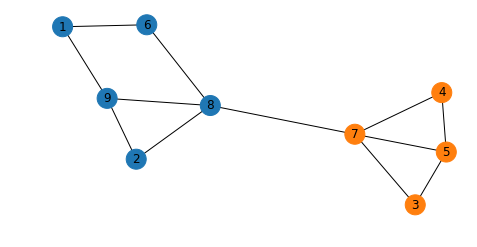

In [18]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

node_colors = [colors[C[u] % len(colors)] for u in graph.nodes()]

plt.figure(figsize = (6,3))
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

## To do

* What is the fraction of edges within clusters?

6 edges dans le bleu:
5 edges dans le orange

au total : 11 edge dans les clusters
12 edge au total

donc 11/12 edges within clusters

* What is the Simpson's index associated with the volume distribution between clusters?

$S = \sum_{k=1}^K q_k²$ = (5/12)^2 + (6/12)^2 = 0.423

* Deduce the modularity of the clustering. 

$$
Q(C) = 1/24 ( A[7][8] - (d_7*d_8)/24 ) \\
= 1/24 ( 1 - 16/24) \\
= 1/24 (8/24) \\
= 8/(480+48+48) \\
= 8/(480+96) \\
= 8/(576) \\
= 0.138 \\
$$

* What is the maximum value of modularity for 2 clusters?

1

Maximum modularity is : 1 - 1/number of clusters

* Complete the function `get_modularity` below and check it on the above graph.

In [2]:
def get_modularity(graph,C):
    '''
    graph: networkx graph
        undirected graph (possibly weighted)
    C: dictionary
        cluster of each node
        
    Returns: float
        modularity adj = np.array(nx.adjacency_matrix(G=graph).todense())
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
            
    clusters = set(C.values())
    cluster_weight = {k: 0 for k in clusters}
    cluster_volume = {k: 0 for k in clusters}
    Q = 0
    # to be completed
    
    adj = np.array(nx.adjacency_matrix(G=graph).todense())

    for u,v in graph.edges():
        if C[u] != C[v]:
            Q += adj[u][v] 
            Q -= graph.degree[u]*graph.degree[v]/(2*len(graph.edges()))
    
    Q = Q/(2*len(graph.edges()))
    
    return Q

In [20]:
get_modularity(graph, C)

0.01388888888888889

## Stochastic block model

The [stochastic block model](https://en.wikipedia.org/wiki/Stochastic_block_model) is a random graph with an underlying structure in clusters (the blocks).

In [21]:
block_sizes = [10, 15, 20]
p_in = 0.4 # probability of connection within blocks
p_out = 0.02 # probability of connection across blocks
graph = nx.random_partition_graph(sizes = block_sizes, p_in = p_in, p_out = p_out,seed = 0)
pos = nx.spring_layout(graph)

In [22]:
pos = nx.spring_layout(graph)

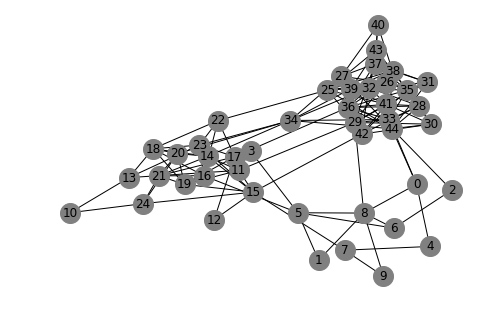

In [23]:
plt.figure(figsize = (6,4))
nx.draw(graph, pos, node_size = 400, node_color = 'gray', with_labels = True)
plt.show()

## To do

* Propose a clustering for this graph and compute the modularity.

In [24]:
block_1 = [10,24,13,18,20,21,19,23,14,22,16,11,17,15,12]
block_2 = [34,25,39,36,42,29,27,41,33,32,26,38,43,5,40,3,37,44,35,28,30,31]
block_3 = [2,6,1,8,0,9,7,4]
C_2 = {}
for i in block_1:
    C_2[i] = 0
for i in block_2:
    C_2[i] = 1
for i in block_3:
    C_2[i] = 2
# C_2

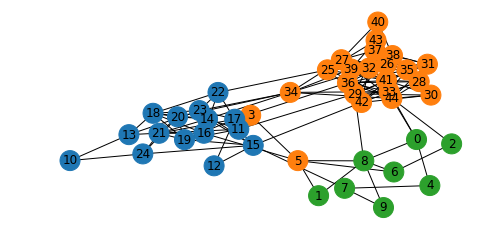

In [25]:
node_colors = [colors[C_2[u] % len(colors)] for u in graph.nodes()]
plt.figure(figsize = (6,3))
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

In [26]:
get_modularity(graph, C_2)

0.009373140249950404

* What is the strongest cluster? 

Cluster 0 (blue) is the strongest

* Complete the function `get_cluster_strength` below and check your guess.

* Comment the results.

**Hint:** Recall that the strength of cluster $k$ is defined by: $$\frac{2w_k }{ v_k}.$$

In [27]:
len(graph.node())

45

In [28]:
def get_cluster_strength(graph,C):
    '''
    graph: networkx graph
        undirected graph (possibly weighted)
    C: dictionary
        cluster of each node
        
    Returns: dictionary
        strength of each cluster
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
    
    clusters = set(C.values())
    cluster_weight = {k: 0 for k in clusters}
    cluster_volume = {k: 0 for k in clusters}
    cluster_strength = {k: 0 for k in clusters}
    
    # to be completed
    
    adj = np.array(nx.adjacency_matrix(G=graph).todense())
    
    for k in cluster_strength.keys():
        
        V = len(graph.node())

        numerateur = 0
        denominateur = 0

        for u,v in graph.edges():
            if C[u] == C[v] and C[u] == k:
                numerateur += adj[u][v]

        numerateur = numerateur/V

        for u in range(V):
            denominateur += np.sum(adj[u])
        denominateur = denominateur/V
        
        cluster_strength[k] = numerateur/denominateur
    
    return cluster_strength

In [29]:
get_cluster_strength(graph, C_2)

{0: 0.13380281690140847, 1: 0.11971830985915494, 2: 0.028169014084507043}

## 2. The Louvain algorithm

The Louvain algorithm attempts to maximize modularity as follows:
1. **(Initialization)** $C \gets \text{identity}$ 
2.  **(Maximization)** While modularity increases, update $C$ by moving one node  from its cluster to one of its neighbors
3. **(Aggregation)** Merge all nodes belonging to the same cluster into a single node, update the weights accordingly and apply step 2 to the  aggregate graph

In step 2, nodes are considered in a cyclic way. The target cluster of a node is chosen among  its neighbors as that providing the **largest gain** in modularity, if any.

## To do

* Complete the function `maximize_modularity` corresponding to step 2.
* Test your `louvain` function on the stochastic block model.
* Test different resolution parameters.

In [30]:
def maximize_modularity(graph, resolution):
    '''
    graph: networkx graph
        undirected graph 
    resolution: float
        resolution parameter (positive)
        
    Returns: dictionary
        cluster of each node
    '''

    node_weight = {u: 0. for u in graph.nodes()}
    w = 0
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        w += graph[u][v]['weight']
    # init the clustering
    C = {u:u for u in graph.nodes()}
    # cluster weights
    cluster_weight = {u: node_weight[u] for u in graph.nodes()}
    # node-cluster weights (between each node and the clusters)
    node_cluster_weight = {u:{v: 1. * graph[u][v]['weight'] for v in graph.neighbors(u) if v != u} 
                           for u in graph.nodes()}
    increase = True
    while increase:
        increase = False
        for u in graph.nodes():
            k = C[u]            
            if k not in node_cluster_weight[u]:
                node_cluster_weight[u][k] = 0
            variation = {k: 0}
            # to be completed
            # update  𝐶  by moving one node from its cluster to one of its neighbors
            
            l = max(variation, key = variation.get)
#             print(l)
            
            if variation[l] > 0:
                increase = True
                # move node u from cluster k to cluster l
                C[u] = l
                cluster_weight[k] -= node_weight[u]
                cluster_weight[l] += node_weight[u]
                for v in graph.neighbors(u):
                    if v != u:
                        node_cluster_weight[v][k] -= graph[u][v]['weight']
                        if node_cluster_weight[v][k] <= 0:
                            node_cluster_weight[v].pop(k)
                        if l not in node_cluster_weight[v]:
                            node_cluster_weight[v][l] = 0
                        node_cluster_weight[v][l] += graph[u][v]['weight']
    return C

In [31]:
def maximize_modularity(graph, resolution):
    '''
    graph: networkx graph
        undirected graph 
    resolution: float
        resolution parameter (positive)
        
    Returns: dictionary
        cluster of each node
    '''

    node_weight = {u: 0. for u in graph.nodes()}
    w = 0
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        w += graph[u][v]['weight']
    # init the clustering
    C = {u:u for u in graph.nodes()}
    # cluster weights
    cluster_weight = {u: node_weight[u] for u in graph.nodes()}
    # node-cluster weights (between each node and the clusters)
    node_cluster_weight = {u:{v: 1. * graph[u][v]['weight'] for v in graph.neighbors(u) if v != u} 
                           for u in graph.nodes()}
    increase = True
    while increase:
        increase = False
        for u in graph.nodes():
            k = C[u]            
            if k not in node_cluster_weight[u]:
                node_cluster_weight[u][k] = 0
            variation = {k: 0}
            
            
            # to be completed
            # update  𝐶  by moving one node from its cluster to one of its neighbors
            for l in node_cluster_weight[u].keys():
                if l!=k:
                    c_k=node_cluster_weight[u][k]
                    c_l=node_cluster_weight[u][l]
                    
                    v_k=cluster_weight[k]
                    v_l=cluster_weight[l]
                    v=sum(list(cluster_weight.values()))

                    delta_Q=(c_l-c_k)/w-(resolution/(v**2))*(2*node_weight[u]*(cluster_weight[l]-cluster_weight[k]+node_weight[u]))
                    
                    variation[l]=delta_Q
                    
            
            l = max(variation, key = variation.get)
            if variation[l] > 0:
                increase = True
                # move node u from cluster k to cluster l
                C[u] = l
                cluster_weight[k] -= node_weight[u]
                cluster_weight[l] += node_weight[u]
                for v in graph.neighbors(u):
                    if v != u:
                        node_cluster_weight[v][k] -= graph[u][v]['weight']
                        if node_cluster_weight[v][k] <= 0:
                            node_cluster_weight[v].pop(k)
                        if l not in node_cluster_weight[v]:
                            node_cluster_weight[v][l] = 0
                        node_cluster_weight[v][l] += graph[u][v]['weight']
    return C

In [32]:
def aggregate_graph(graph,C):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
        
    Returns: networkx graph
        aggregate graph with one node per cluster
    '''

    aggregate_graph_ = nx.Graph()
    aggregate_graph_.add_nodes_from(set(C.values()))
    for u,v in graph.edges():
        if aggregate_graph_.has_edge(C[u],C[v]):
            aggregate_graph_[C[u]][C[v]]['weight'] += graph[u][v]['weight']
        else:
            aggregate_graph_.add_edge(C[u],C[v])
            aggregate_graph_[C[u]][C[v]]['weight'] = graph[u][v]['weight']
    return aggregate_graph_

In [33]:
def louvain(graph,resolution = 1):
    '''
    graph: networkx graph
        undirected graph 
    resolution: float
        resolution parameter (positive)
        
    Returns: dictionary
        cluster of each node
    '''

    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1

    C = maximize_modularity(graph, resolution)
    n = len(C)
    k = len(set(C.values()))
    while k < n:
        aggregate_graph_ = aggregate_graph(graph,C) 
        C_new = maximize_modularity(aggregate_graph_, resolution)
        C = {u: C_new[C[u]] for u in graph.nodes()}
        n = k
        k = len(set(C_new.values()))
    # reindex clusters in decreasing order of size
    clusters = list(set(C.values()))
    cluster_size = {k: 0 for k in clusters}
    for u in C:
        cluster_size[C[u]] += 1
    cluster_index = sorted(cluster_size, key = cluster_size.get, reverse = True)
    reindex = {k:i for i,k in enumerate(cluster_index)}
    C = {u:reindex[C[u]] for u in C}
    return C

In [34]:
block_sizes = [20, 20, 20]
p_in = 0.5 # probability of connection within blocks
p_out = 0.1 # probability of connection across blocks
graph_s = nx.random_partition_graph(sizes = block_sizes, p_in = p_in, p_out = p_out,seed = 20)
pos = nx.spring_layout(graph_s)

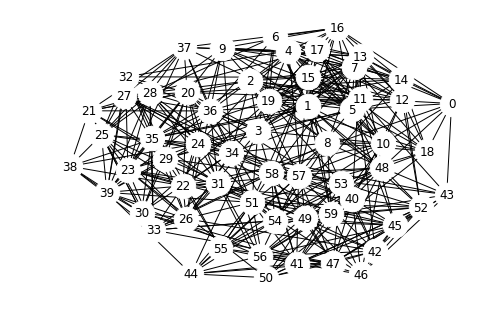

In [35]:
pos = nx.kamada_kawai_layout(graph_s)
plt.figure(figsize = (6,4))
nx.draw(graph_s, pos, node_size = 600, node_color = 'white', with_labels = True)
plt.show()

In [36]:
C_3 = louvain(graph_s, resolution=1)

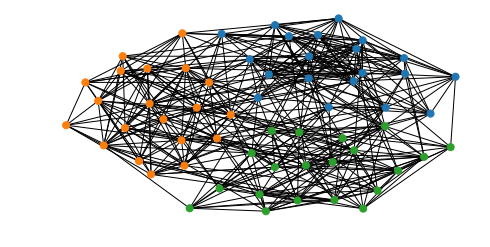

In [37]:
pos = nx.kamada_kawai_layout(graph_s)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

node_colors = [colors[C_3[u] % len(colors)] for u in graph_s.nodes()]


plt.figure(figsize = (6,3))
nx.draw(graph_s, pos, node_size = 50, node_color = node_colors, with_labels = False)
plt.show()

## Real data

The function `get_clusters` below returns the clusters as lists of nodes in decreasing order of weight.

In [39]:
def get_clusters(graph, C):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
        
    Returns: dictionary of lists
        for each cluster, nodes are listed in decreasing order of weight
    '''

    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1

    node_weight = {u: 0 for u in graph.nodes()}
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        
    clusters = list(set(C.values()))
    cluster_nodes = {k:{} for k in clusters}
    for u in graph.nodes():
        cluster_nodes[C[u]][u] = node_weight[u]

    cluster_nodes = {k: sorted(cluster_nodes[k], key = cluster_nodes[k].get, reverse = True)
                             for k in clusters}
        
    return cluster_nodes

[2, 19, 1, 36, 39, 20, 51, 40, 48]


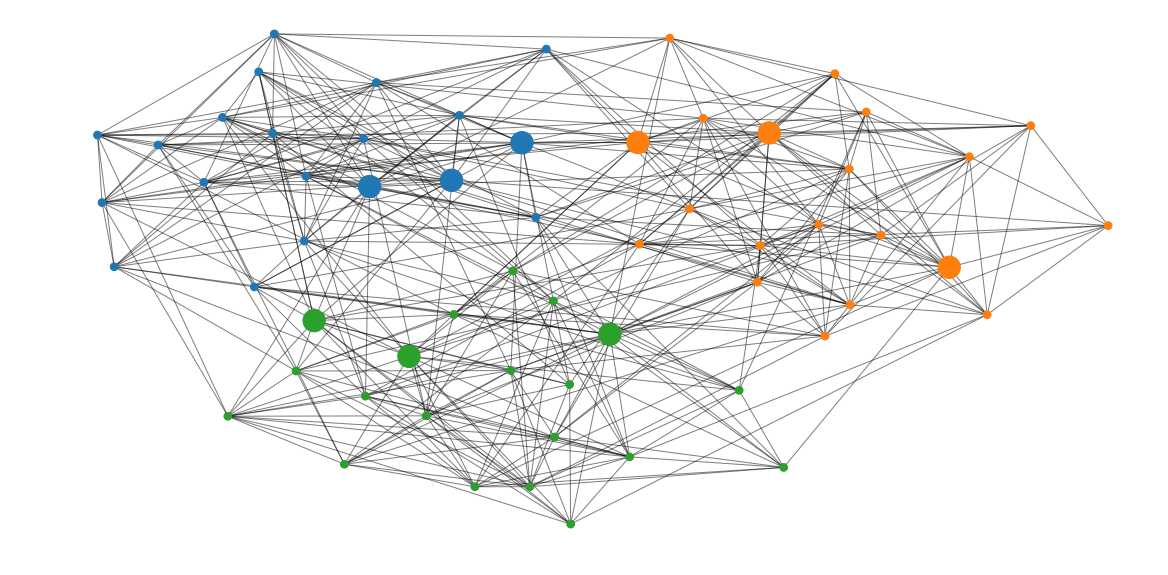

In [40]:
dict_s = get_clusters(graph_s, C_3)

top_ = {c:dict_s[c][:3] for c in dict_s.keys()}

top = []
for u in top_.values():
    top=top+u

print(top)
    
node_colors = [colors[C_3[u] % len(colors)] for u in graph_s.nodes()]
node_dict = {u:colors[C_3[u] % len(colors)] for u in graph_s.nodes()}

topnode_colors = [node_dict[u] for u in top]

pos=nx.spring_layout(graph_s)
pos_ = {u:pos[u] for u in top}

plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(graph_s, pos, node_size = 60, node_color = node_colors)
nx.draw_networkx_edges(graph_s, pos, alpha = .5)
nx.draw_networkx_nodes(graph_s, pos_, nodelist=top, node_size = 500, node_color = topnode_colors)

plt.show()

## To do

* List the top-3 characters of each cluster of Les Miserables (resolution 1).
* List the top-3 airports of each cluster of Openflights (resolutions 1 and 2); visualize the clusters, with the associate top airports.
* List the top-5 pages of the 20 largest clusters of Wikipedia for Schools (resolution 2). Compare the results obtained when the graph is considered as undirected and bipartite.
* List the top-5 actors in the cluster of **Marion Cotillard** in the actors-movies graph (resolution 10).

**Note:** You may compute the size and strength of each cluster.

In [43]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)
name_miserable = nx.get_node_attributes(miserables, 'name')

In [47]:
cluster_miserable = get_clusters(miserables, louvain(miserables, resolution=1))
for cluster, nodes in cluster_miserable.items():
    name = []
    for i in range(3):
        name.append(name_miserable[nodes[i]])
    print("{} : {}".format(cluster, name))

0 : ['Valjean', 'Marius', 'Cosette']
1 : ['Enjolras', 'Courfeyrac', 'Combeferre']
2 : ['Myriel', 'Mme Magloire', 'Mlle Baptistine']
3 : ['Thenardier', 'Mme Thenardier', 'Babet']
4 : ['Fantine', 'Tholomyes', 'Favourite']
5 : ['Judge', 'Champmathieu', 'Bamatabois']


In [52]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)
name_openflights = nx.get_node_attributes(openflights, 'name')

In [ ]:
cluster_openflights = get_clusters(openflights, louvain(openflights))

In [53]:
for cluster,nodes in cluster_openflights.items():
    name = []
    for i in range(3):
        name.append(name_openflights[nodes[i]])
    print("{} : {}".format(cluster, name))

0 : ['Hartsfield Jackson Atlanta International Airport', 'Dallas Fort Worth International Airport', "Chicago O'Hare International Airport"]
1 : ['Beijing Capital International Airport', 'Shanghai Pudong International Airport', 'Chek Lap Kok International Airport']
2 : ['Amsterdam Airport Schiphol', 'Charles de Gaulle International Airport', 'Dublin Airport']
3 : ['Atatürk International Airport', 'Dubai International Airport', 'OR Tambo International Airport']
4 : ['Guarulhos - Governador André Franco Montoro International Airport', 'El Dorado International Airport', 'Viracopos International Airport']
5 : ['Sydney Kingsford Smith International Airport', 'Port Moresby Jacksons International Airport', 'Melbourne International Airport']
6 : ['Domodedovo International Airport', 'Sheremetyevo International Airport', 'Pulkovo Airport']
7 : ['Ted Stevens Anchorage International Airport', 'Nome Airport', 'Bethel Airport']
8 : ['Quebec Jean Lesage International Airport', 'Yellowknife Airport', '

IndexError: list index out of range

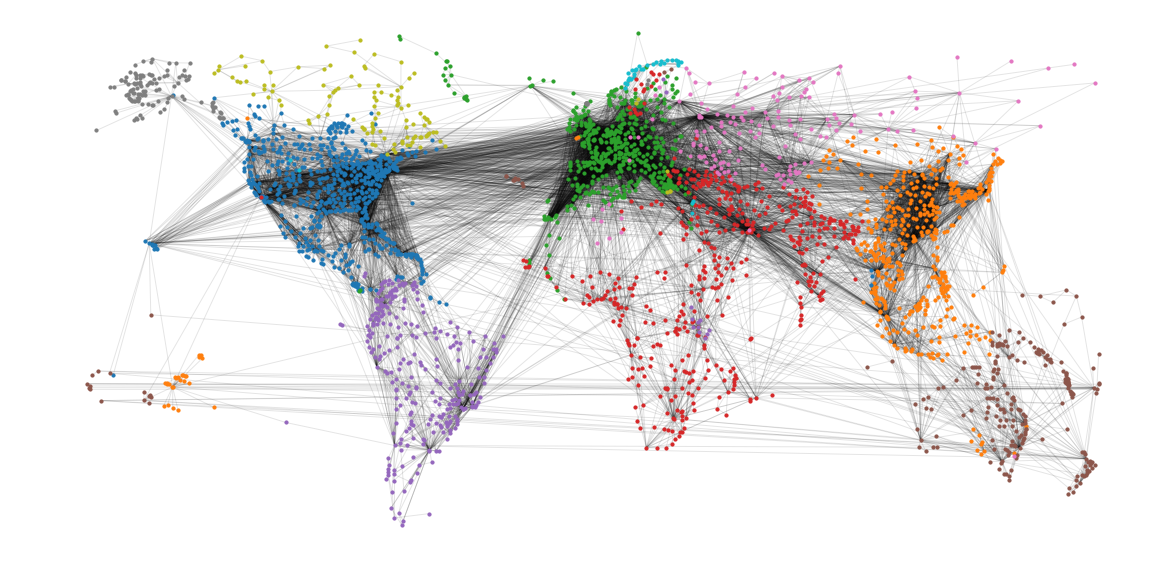

In [55]:
# Get Colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# node_colors = [colors[cluster_openflights[u] % len(colors)] for u in openflights.nodes()]
# node_dict= {u:colors[cluster_openflights[u] % len(colors)] for u in openflights.nodes()}


# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
for cluster,nodes in cluster_openflights.items():
    nx.draw_networkx_nodes(openflights, pos, node_size = 10,nodelist=nodes, node_color = colors[cluster % len(colors)])
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

In [58]:
cluster_openflights_2 = get_clusters(openflights, louvain(openflights, resolution=2))

In [56]:
# for cluster,nodes in cluster_openflights_2.items():
#     print("{} : {}".format(cluster, nodes[:3]))

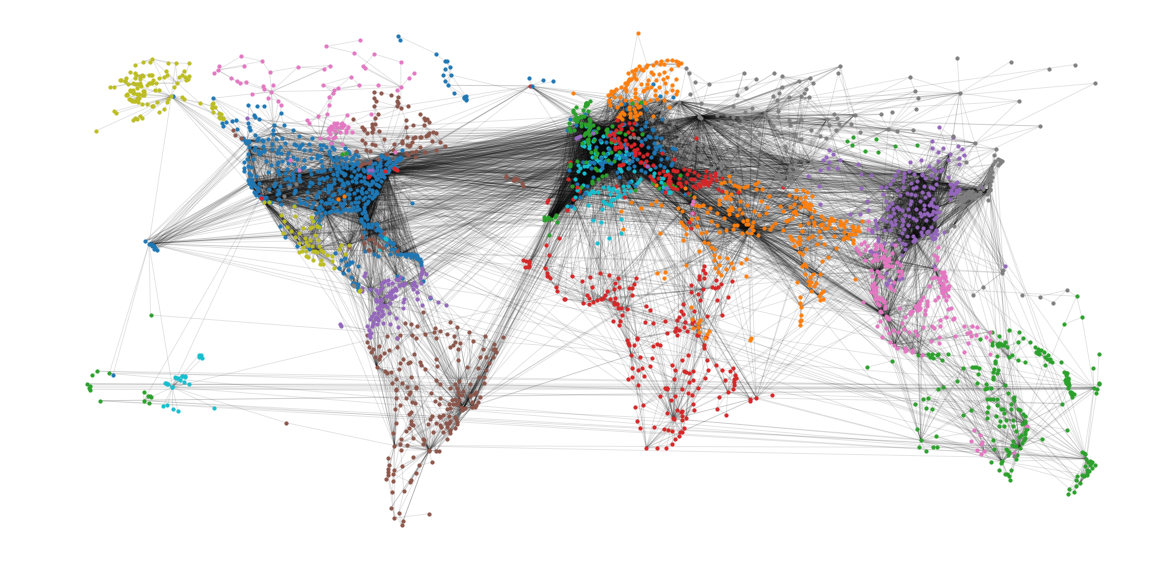

In [59]:
# Get Colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
for cluster,nodes in cluster_openflights_2.items():
    nx.draw_networkx_nodes(openflights, pos, node_size = 10,nodelist=nodes, node_color = colors[cluster % len(colors)])
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

In [60]:
wikipedia = nx.read_graphml("wikipedia_schools.graphml", node_type = int)
wiki_names = nx.get_node_attributes(wikipedia, 'name')

In [61]:
wikipedia_undirected = wikipedia.to_undirected()

In [ ]:
cluster_wiki_undirected = get_clusters(wikipedia_undirected, louvain(wikipedia_undirected, resolution=2))

cluster_wiki_undirected = sorted(cluster_wiki_undirected.items(), key=lambda kv: len(kv[1]), reverse=True)

In [61]:
len(cluster_wiki_undirected)

24

In [62]:
cluster_wiki_undirected_dict = {}
for tuple_ in cluster_wiki_undirected:
    cluster_wiki_undirected_dict[tuple_[0]] = tuple_[1]
cluster_wiki_undirected_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [63]:
# sorted(x.items(), key=lambda kv: kv[1])

i=0
for cluster,nodes in cluster_wiki_undirected_dict.items():
    name= []
    for i in range(max(5,len(nodes))):
        name.append(wiki_names[nodes[i]])
    print(len(name))
    print("{} : {}".format(cluster, name))
    i+=1
    if i>20:
        break

480
0 : ['Europe', 'Africa', 'Scientific classification', 'Animal', 'North America', 'Asia', 'Chordate', 'Binomial nomenclature', 'Bird', 'Carolus Linnaeus', 'Mammal', 'Evolution', 'Fish', 'Dinosaur', 'Fossil', 'Reptile', 'Insect', 'Cretaceous', 'Horse', 'Cattle', 'Bird migration', 'History of Earth', 'Lion', 'Extinction', 'Dog', 'Elephant', 'Fauna of Australia', 'Chicken', 'Aquarium', 'Herbivore', 'Jurassic', 'Rainforest', 'Albatross', 'Whale', 'Shark', 'Ostrich', 'Cat', 'Tiger', 'Carnivore', 'Eagle', 'Tyrannosaurus', 'Frog', 'Miocene', 'Hippopotamus', 'Vertebrate', 'Triassic', 'Camel', 'Cheetah', 'Bat', 'Ant', 'Eocene', 'Dolphin', 'Orca', 'Owl', 'Bear', 'Pliocene', 'Feather', 'Devonian', 'Penguin', 'Permian', 'Pig', 'Saurischia', 'Arthropod', 'Paleontology', 'Giant Panda', 'Galapagos Islands', 'Gerald Durrell', 'Chimpanzee', 'Giraffe', 'Fossil record', 'Invertebrate', 'Crocodile', 'Crustacean', 'Cretaceous-Tertiary extinction event', 'Spider', 'Carboniferous', 'Cactus', 'Beaver', 'Cr

In [48]:
def bipartite_from_directed(graph):
    '''
    graph: networkx graph
        directed graph 
        
    Returns: networkx graph
        undirected, bipartite graph
    '''    
    new_graph = nx.Graph()
    nodes = list(graph.nodes())
    if nodes == list(np.arange(len(nodes))):
        new_graph.add_nodes_from(nodes)
        new_graph.add_nodes_from(list(np.arange(-len(nodes),0)))
        edges = [(u,-v-1) for u,v in graph.edges()]
        new_graph.add_edges_from(edges)
    else:
        print('Nodes must be indexed from 0 to n-1.')
    return new_graph

In [49]:
wikipedia_bipartite = bipartite_from_directed(wikipedia)

In [ ]:
cluster_wiki_bipartite = get_clusters(wikipedia_bipartite, louvain(wikipedia_bipartite, resolution=2))

cluster_wiki_bipartite = sorted(cluster_wiki_bipartite, key=lambda k: len(cluster_wiki_bipartite[k]), reverse=True)

i=0
for cluster,nodes in cluster_wiki_bipartite.items():
    name= []
    for i in range(max(5,len(nodes))):
        name.append(wiki_names[nodes[i]])
    print("{} : {}".format(cluster, name))
    i+=1
    if i>20:
        break

In [ ]:
actors_movies = nx.read_graphml("actors_movies.graphml", node_type = int)

In [ ]:
actors_name = nx.get_node_attribute(actors_movies, 'name')

In [ ]:
cluster_actors = get_clusters(actors_movies, louvain(actors_movies, resolution=10))

marion_cotillard = 5172

for cluster,nodes in cluster_actors.items():
    if marion_cotillard in nodes:
        for i in range(max(5,len(nodes))):
            print(actors_name[nodes[i]])
        break

## 3. Soft clustering

We have so far considered **hard clustering** where the objective is to find a partition of the set of nodes. In practice, it may be interesting to allow some nodes to belong to several clusters. This is **soft clustering**. A simple approach consists in identifying so-called flipping nodes, for which a change of cluster has a negligible impact on modularity (for some given threshold). 

## To do

* Complete the function `get_flipping_nodes` below.
* Test your function on the bow-tie graph.
* Display the airports belonging to several clusters in Openflights (resolutions 1 and 2).

In [ ]:
def get_flipping_nodes(graph, C, resolution = 1, threshold = 1e-5):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
    resolution: float
        resolution parameter 
    threshold: float
        threshold on modularity 
        
    Returns: dictionary of lists
        list of clusters of each flipping node (i.e., with more than 1 cluster)
    '''

    flipping_nodes = {}
    # to be completed
    return flipping_nodes 

In [62]:
# By Hany Daher

def get_flipping_nodes(graph, C, resolution = 1, threshold = 1e-5):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
    resolution: float
        resolution parameter 
    threshold: float
        threshold on modularity 
        
    Returns: dictionary of lists
        list of clusters of each flipping node (i.e., with more than 1 cluster)
    '''

    flipping_nodes = {}
    # to be completed
    node_weight = {u: 0. for u in graph.nodes()}
    w = 0
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        w += graph[u][v]['weight']
    # cluster weights
    cluster_weight = get_cluster_volumes(graph,C)
    # node-cluster weights (between each node and the clusters)
    node_cluster_weight = {}
    for u in graph.nodes():
        node_cluster_weight.update({u:{}})
        for v in graph.neighbors(u):
            if(v!=u):
                if(C[v] in node_cluster_weight[u]):
                    node_cluster_weight[u][C[v]] += graph[u][v]['weight']
                else:
                    node_cluster_weight[u].update({C[v]:graph[u][v]['weight']})
    
    for u in graph.nodes():
        k = C[u]            
        if k not in node_cluster_weight[u]:
            node_cluster_weight[u][k] = 0
        
        is_flip = False
        
        for v in node_cluster_weight[u]:
            if(v!=k):
                var1 = (1/w)*(node_cluster_weight[u][v]-node_cluster_weight[u][k])
                var2 = 2*(resolution*node_weight[u]/(4*w**2))*(cluster_weight[v]-cluster_weight[k]+node_weight[u])
                var = abs(var1-var2)
                if var < threshold:
                    if is_flip == True:
                        flipping_nodes[u].append(v)
                    else:
                        flipping_nodes.update({u:[v]})
                        is_flip = True
                    
        if is_flip == True:
            flipping_nodes[u].append(k)
                    
    return flipping_nodes

def get_cluster_volumes(graph,C):
    '''
    Returns: dictionary
        volume of each cluster
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
    
    clusters = set(C.values())
    cluster_volume = {k: 0 for k in clusters}
    
    for u,v in graph.edges():
        if(C[u] == C[v]):
            cluster_volume[C[v]] += graph[u][v]['weight']*2
        else:
            cluster_volume[C[u]] += graph[u][v]['weight']
            cluster_volume[C[v]] += graph[u][v]['weight']

    return cluster_volume

In [63]:
bowtie = nx.star_graph(4)
bowtie.add_edges_from([(1,2),(3,4)])

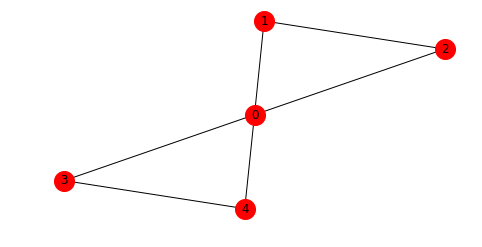

In [64]:
plt.figure(figsize = (6,3))
nx.draw(bowtie, node_size = 400, with_labels = True)
plt.show()

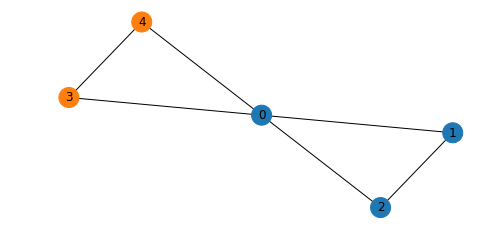

In [65]:
C_b = louvain(bowtie, resolution=1)
node_colors_b = [colors[C_b[u] % len(colors)] for u in bowtie.nodes()]


plt.figure(figsize = (6,3))
nx.draw(bowtie, node_size = 400, node_color = node_colors_b, with_labels = True)
plt.show()

In [66]:
get_flipping_nodes(bowtie, C_b)

{0: [1, 0]}